# Environment Setup

In [119]:
%%capture
%pip install -r requirements.txt

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Your NASDAQ Data

In [121]:
df = pd.read_csv('data/HistoricalData.csv')
df.rename(columns={ 'Close/Last': 'Close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.head(5)

,Date,Close,Open,High,Low
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04


# Data Validation

In [122]:
df.isnull().sum()

Date     0
Close    0
Open     0
High     0
Low      0
dtype: int64

Verified the dataset for missing values \
The result shows **0 null values across all columns**, which means the dataset is complete and does not require any imputation or data cleaning for missing entries.  

# Add Technical Indicators

To enrich our analysis, we computed several key technical indicators:

- **Daily & Log Returns**: Capture percentage and log-based changes in price, essential for understanding performance and risk.  
- **Moving Averages (5, 10, 20 days)**: Smooth short- and medium-term price trends, helping to identify momentum and potential support/resistance levels.  
- **Volatility (5, 10 days)**: Rolling standard deviation of returns, indicating short-term risk and market uncertainty.  
- **RSI (14 days)**: Measures speed and magnitude of price movements to identify overbought/oversold conditions.  
- **Bollinger Bands (20 days)**: Track price deviations around the moving average, highlighting volatility shifts and potential breakout points.  

These indicators provide multiple perspectives (trend, momentum, volatility), adding depth to the raw price data and strengthening both descriptive and predictive analysis.

In [123]:
# Returns
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Date,Close,Open,High,Low,Daily_Return,Log_Return
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42,NaN,NaN
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97,-0.006353,-0.006374
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85,-0.007965,-0.007997
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49,-0.028205,-0.028610
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04,-0.035151,-0.035784


In [124]:
# Moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df.head()

,Date,Close,Open,High,Low,Daily_Return,Log_Return,MA_5,MA_10,MA_20
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42,NaN,NaN,NaN,NaN,NaN
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97,-0.006353,-0.006374,NaN,NaN,NaN
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85,-0.007965,-0.007997,NaN,NaN,NaN
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49,-0.028205,-0.028610,NaN,NaN,NaN
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04,-0.035151,-0.035784,4950.726,NaN,NaN


In [125]:
# Volatility
df['Volatility_5'] = df['Daily_Return'].rolling(window=5).std()
df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()
df.head()

,Date,Close,Open,High,Low,Daily_Return,Log_Return,MA_5,MA_10,MA_20,Volatility_5,Volatility_10
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97,-0.006353,-0.006374,NaN,NaN,NaN,NaN,NaN
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85,-0.007965,-0.007997,NaN,NaN,NaN,NaN,NaN
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49,-0.028205,-0.028610,NaN,NaN,NaN,NaN,NaN
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04,-0.035151,-0.035784,4950.726,NaN,NaN,NaN,NaN


In [126]:
# RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))
df


,Date,Close,Open,High,Low,Daily_Return,Log_Return,MA_5,MA_10,MA_20,Volatility_5,Volatility_10,RSI
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97,-0.006353,-0.006374,NaN,NaN,NaN,NaN,NaN,NaN
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85,-0.007965,-0.007997,NaN,NaN,NaN,NaN,NaN,NaN
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49,-0.028205,-0.028610,NaN,NaN,NaN,NaN,NaN,NaN
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04,-0.035151,-0.035784,4950.726,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-08-08,21450.02,21316.37,21464.53,21284.97,0.009760,0.009712,21166.454,21101.139,20994.7235,0.009791,0.011438,61.705739
3,2025-08-11,21385.40,21459.65,21549.73,21346.62,-0.003013,-0.003017,21232.818,21121.821,21031.9770,0.007984,0.011511,62.222178
2,2025-08-12,21681.90,21507.44,21689.68,21386.25,0.013865,0.013769,21385.888,21180.182,21082.1820,0.006949,0.012032,65.147105
1,2025-08-13,21713.14,21764.55,21803.75,21645.14,0.001441,0.001440,21494.632,21238.529,21131.3145,0.006716,0.012032,65.039896


In [127]:
# Bollinger Bands
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
bb_std = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (bb_std * 2)
df['BB_Lower'] = df['BB_Middle'] - (bb_std * 2)
df

,Date,Close,Open,High,Low,Daily_Return,Log_Return,MA_5,MA_10,MA_20,Volatility_5,Volatility_10,RSI,BB_Middle,BB_Upper,BB_Lower
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97,-0.006353,-0.006374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85,-0.007965,-0.007997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49,-0.028205,-0.028610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04,-0.035151,-0.035784,4950.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-08-08,21450.02,21316.37,21464.53,21284.97,0.009760,0.009712,21166.454,21101.139,20994.7235,0.009791,0.011438,61.705739,20994.7235,21418.397478,20571.049522
3,2025-08-11,21385.40,21459.65,21549.73,21346.62,-0.003013,-0.003017,21232.818,21121.821,21031.9770,0.007984,0.011511,62.222178,21031.9770,21455.471286,20608.482714
2,2025-08-12,21681.90,21507.44,21689.68,21386.25,0.013865,0.013769,21385.888,21180.182,21082.1820,0.006949,0.012032,65.147105,21082.1820,21563.068882,20601.295118
1,2025-08-13,21713.14,21764.55,21803.75,21645.14,0.001441,0.001440,21494.632,21238.529,21131.3145,0.006716,0.012032,65.039896,21131.3145,21659.387182,20603.241818


In [128]:
df.isnull().sum()

Date              0
Close             0
Open              0
High              0
Low               0
Daily_Return      1
Log_Return        1
MA_5              4
MA_10             9
MA_20            19
Volatility_5      5
Volatility_10    10
RSI              13
BB_Middle        19
BB_Upper         19
BB_Lower         19
dtype: int64

# Null Value Handling

After adding technical indicators, we now have null values due to rolling calculations. We need to handle these appropriately for our analysis.


In [129]:
print("Null values in each column:")
print(df.isnull().sum())
print(f"\nTotal rows: {len(df)}")
print(f"Rows with any null values: {df.isnull().any(axis=1).sum()}")

Null values in each column:
Date              0
Close             0
Open              0
High              0
Low               0
Daily_Return      1
Log_Return        1
MA_5              4
MA_10             9
MA_20            19
Volatility_5      5
Volatility_10    10
RSI              13
BB_Middle        19
BB_Upper         19
BB_Lower         19
dtype: int64

Total rows: 2517
Rows with any null values: 19


In [130]:
# Strategic null handling for specific columns
# Handle different types of nulls with domain-specific logic

# For returns, fill first value with 0 (no return on first day)
df['Daily_Return'].fillna(0, inplace=True)
df['Log_Return'].fillna(0, inplace=True)

# For moving averages, use the closing price for initial values
df['MA_5'].fillna(df['Close'], inplace=True)
df['MA_10'].fillna(df['Close'], inplace=True)
df['MA_20'].fillna(df['Close'], inplace=True)
df['BB_Middle'].fillna(df['Close'], inplace=True)
df['BB_Upper'].fillna(df['Close'], inplace=True)
df['BB_Lower'].fillna(df['Close'], inplace=True)

# For volatility, use low volatility value (0.01) for initial periods
df['Volatility_5'].fillna(0.01, inplace=True)
df['Volatility_10'].fillna(0.01, inplace=True)

# For RSI, use neutral value of 50 (neither overbought nor oversold)
df['RSI'].fillna(50, inplace=True)

print(f"Null values remaining: {df.isnull().sum().sum()}")
print(f"All rows preserved: {len(df)} rows")

# Show first few rows
print("\nFirst 10 rows after strategic filling:")
print(df.head(10)[['Date', 'Close', 'Daily_Return', 'MA_5', 'MA_10', 'MA_20', 'RSI', 'Volatility_5', 'Volatility_10']].to_string())


Null values remaining: 0
All rows preserved: 2517 rows

First 10 rows after strategic filling:
           Date    Close  Daily_Return      MA_5     MA_10    MA_20   RSI  Volatility_5  Volatility_10
2516 2015-08-17  5091.70      0.000000  5091.700  5091.700  5091.70  50.0      0.010000           0.01
2515 2015-08-18  5059.35     -0.006353  5059.350  5059.350  5059.35  50.0      0.010000           0.01
2514 2015-08-19  5019.05     -0.007965  5019.050  5019.050  5019.05  50.0      0.010000           0.01
2513 2015-08-20  4877.49     -0.028205  4877.490  4877.490  4877.49  50.0      0.010000           0.01
2512 2015-08-21  4706.04     -0.035151  4950.726  4706.040  4706.04  50.0      0.010000           0.01
2511 2015-08-24  4526.25     -0.038204  4837.636  4526.250  4526.25  50.0      0.015074           0.01
2510 2015-08-25  4506.49     -0.004366  4727.064  4506.490  4506.49  50.0      0.015644           0.01
2509 2015-08-26  4697.54      0.042394  4662.762  4697.540  4697.54  50.0      0.

In [134]:
# Verify all null values are handled
print("Final null value check:")
print(df.isnull().sum())
print(f"\nTotal null values in dataset: {df.isnull().sum().sum()}")
print(f"Dataset ready for analysis!")

Final null value check:
Date             0
Close            0
Open             0
High             0
Low              0
Daily_Return     0
Log_Return       0
MA_5             0
MA_10            0
MA_20            0
Volatility_5     0
Volatility_10    0
RSI              0
BB_Middle        0
BB_Upper         0
BB_Lower         0
dtype: int64

Total null values in dataset: 0
Dataset ready for analysis!


# Save Processed Data

In [131]:
df.to_csv('data/processed/nasdaq_processed.csv')
print(f"Final dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Final dataset shape: (2517, 16)
Date range: 2015-08-17 00:00:00 to 2025-08-14 00:00:00


In [132]:
df.describe()


,Date,Close,Open,High,Low,Daily_Return,Log_Return,MA_5,MA_10,MA_20,Volatility_5,Volatility_10,RSI,BB_Middle,BB_Upper,BB_Lower
count,2517,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,2020-08-10 20:12:52.348033536,10718.455737,10710.819710,10784.306544,10630.028713,0.000674,0.000576,10705.189643,10688.463789,10655.962749,0.011512,0.011894,56.689441,10655.962749,11113.100106,10198.825392
min,2015-08-17 00:00:00,4266.840000,0.000000,0.000000,0.000000,-0.123213,-0.131492,4288.090000,4376.558000,4453.875500,0.001344,0.001931,11.622703,4453.875500,4506.490000,4190.676984
25%,2018-02-09 00:00:00,6963.850000,6959.630000,7025.850000,6903.390000,-0.005132,-0.005145,6973.064000,6998.523000,6958.882500,0.006150,0.006948,44.577824,6958.882500,7303.435574,6689.660118
50%,2020-08-11 00:00:00,10536.270000,10531.640000,10608.840000,10399.860000,0.001062,0.001062,10537.388000,10563.937000,10613.072000,0.009581,0.010155,57.865898,10613.072000,11115.914538,10088.318308
75%,2023-02-09 00:00:00,14047.500000,14045.210000,14141.070000,13952.800000,0.007681,0.007651,14024.144000,13972.374000,13912.542500,0.014642,0.014906,69.076209,13912.542500,14522.027622,13291.345724
max,2025-08-14 00:00:00,21713.140000,21764.550000,21803.750000,21645.140000,0.121632,0.114784,21588.226000,21297.351000,21172.565500,0.095581,0.073665,99.333906,21172.565500,21746.720705,20608.482714
std,NaN,4484.646077,4495.744077,4526.662353,4459.469325,0.013985,0.014011,4474.711953,4464.156073,4443.516938,0.008419,0.007602,16.308729,4443.516938,4658.134250,4243.239095


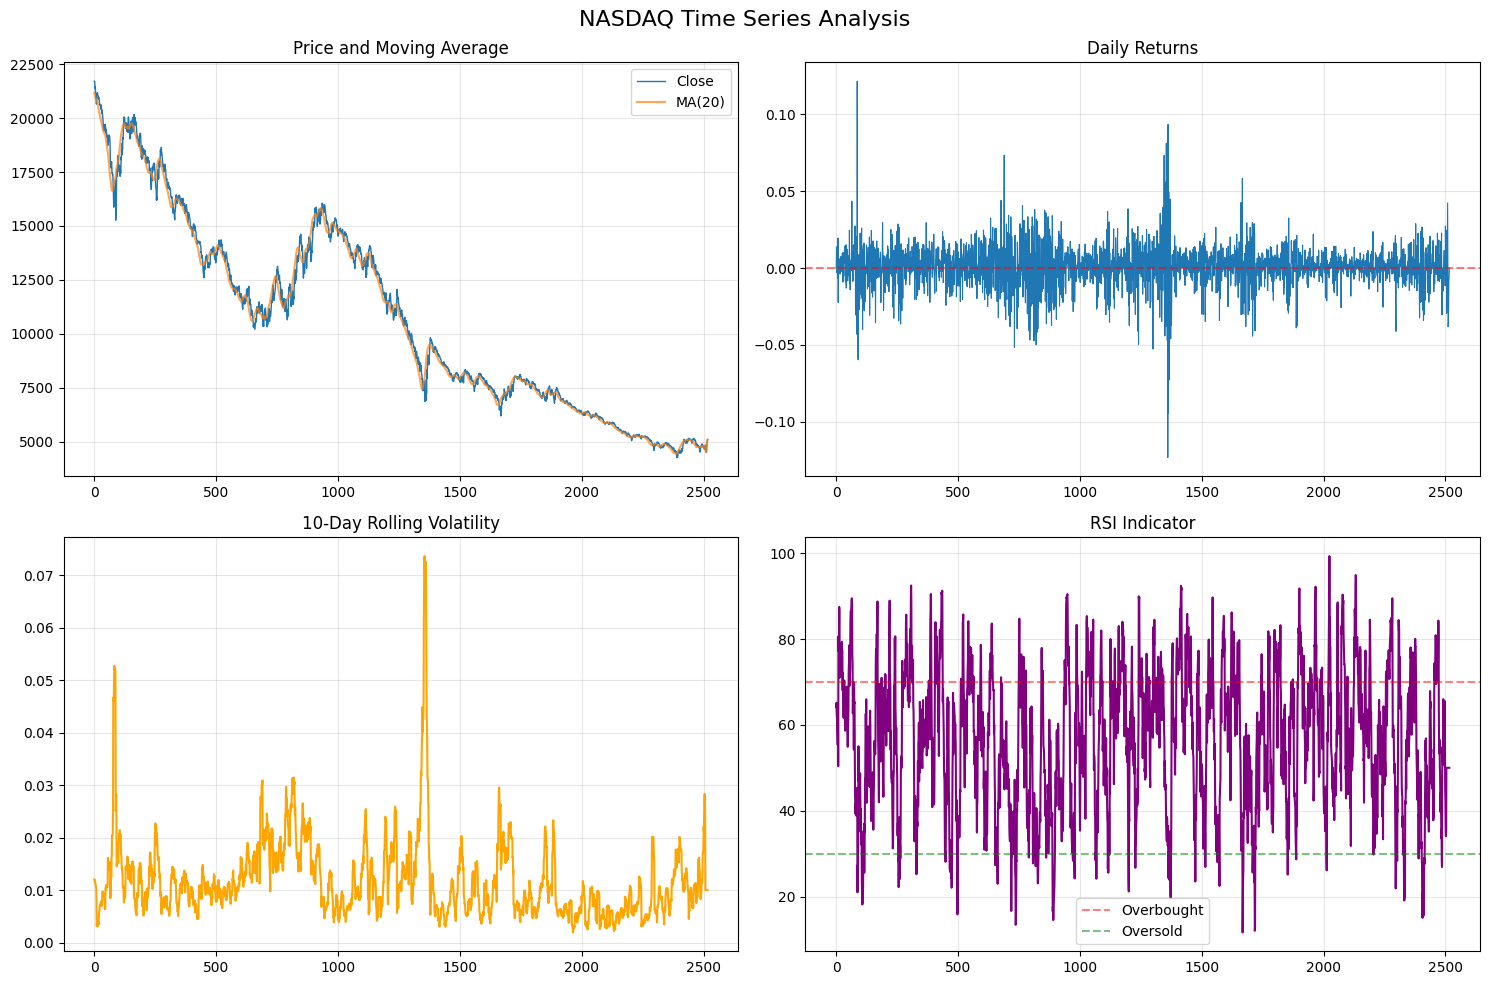

In [133]:
# Create comprehensive plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('NASDAQ Time Series Analysis', fontsize=16)

# Price levels
axes[0,0].plot(df.index, df['Close'], label='Close', linewidth=1)
axes[0,0].plot(df.index, df['MA_20'], label='MA(20)', alpha=0.7)
axes[0,0].set_title('Price and Moving Average')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Daily returns
axes[0,1].plot(df.index, df['Daily_Return'], linewidth=0.8)
axes[0,1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0,1].set_title('Daily Returns')
axes[0,1].grid(True, alpha=0.3)

# Volatility
axes[1,0].plot(df.index, df['Volatility_10'], color='orange')
axes[1,0].set_title('10-Day Rolling Volatility')
axes[1,0].grid(True, alpha=0.3)

# RSI
axes[1,1].plot(df.index, df['RSI'], color='purple')
axes[1,1].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought')
axes[1,1].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold')
axes[1,1].set_title('RSI Indicator')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()